In [148]:
import pybinding as pb
import numpy as np
from numpy import sqrt as sqrt
import matplotlib.pyplot as plt
from numpy import exp, dot, einsum, cos, sin, pi
import sympy as sp
import cmath

In [149]:
m_e = 0.5109989461 #(electron mass in MeV / c^2)
hbar = 6.6*10**(-16) # hbar in eV * seconds
c = 3*10**18 # speed of light in angstroms per second
prefac = ((hbar*c)**2/(2*m_e*10**6)) # prefactor of free electron dispersion
a = 5;

In [150]:
def band_dispersion(m_x, m_y, k_x, k_y):
    return prefac*(k_x**2/(m_x)+k_y**2/(m_y))

In [159]:
m_x = 2 
m_y = 3
a = 2
Nuc = 1000
Nk = round(Nuc*a)
k_x = np.linspace(-pi, pi, Nk).reshape((Nk, 1)) # We want the momenta to have a spacing given by 2*pi/L
k_y = np.linspace(-pi, pi, Nk).reshape((1, Nk)) # We want the momenta to have a spacing given by 2*pi/L
energies = band_dispersion(m_x, m_y, k_x, k_y).flatten()

In [160]:
dos, dos_energies = np.histogram(energies, 500)
normalized_dos = 2*dos/len(energies)/np.diff(dos_energies)[0]

In [161]:
analytic_result = sqrt(m_x*m_y)*(10**6)*m_e/(hbar*c)**2/pi

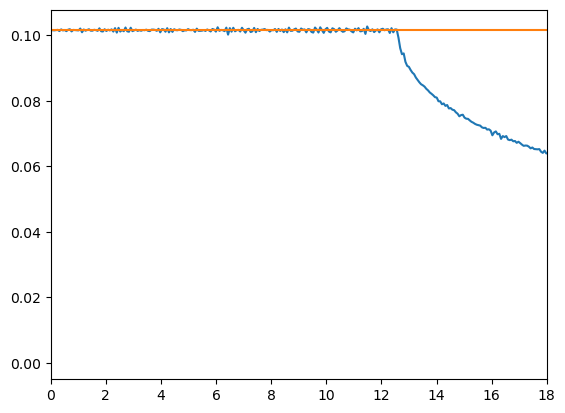

In [162]:
plt.plot(dos_energies[0:-1], normalized_dos)
plt.plot(dos_energies[0:-1], np.repeat(analytic_result, len(dos_energies)-1))
plt.xlim(0, 18);